# <a id='toc1_'></a>[Merged notebooks for Not Supported CIViC and MOA evidence (assertion analysis)](#toc0_)

The merged_moa_civic_evidence_analysis notebook contains an analysis on variants and evidence items merged from MOA and CIViC

**Table of contents**<a id='toc0_'></a>    
- [Merged notebooks for Not Supported CIViC and MOA evidence (assertion analysis)](#toc1_)    
    - [Create output directory](#toc1_1_1_)    
  - [Merge CIViC and MOA Summary Variant Dataframes](#toc1_2_)    
    - [Summary Table 1](#toc1_2_1_)    
    - [Building Summary Table 2](#toc1_2_2_)    
    - [Summary Table 2](#toc1_2_3_)    
    - [Building Summary Table 3](#toc1_2_4_)    
    - [Summary Table 3](#toc1_2_5_)    
    - [Building Summary Table 4](#toc1_2_6_)    
    - [Summary Table 4](#toc1_2_7_)    
    - [Building Summary Table 5](#toc1_2_8_)    
    - [Summary Table 5](#toc1_2_9_)    
    - [Building Summary Table 6](#toc1_2_10_)    
    - [Summary Table 6](#toc1_2_11_)    
  - [Merge CIViC and MOA Summary Evidence Dataframes](#toc1_3_)    
    - [Summary Table 7](#toc1_3_1_)    
    - [Building Summary Table 8](#toc1_3_2_)    
    - [Summary Table 8](#toc1_3_3_)    
    - [Building Summary Table 9](#toc1_3_4_)    
    - [Summary Table 9](#toc1_3_5_)    
    - [Building Summary Table 10](#toc1_3_6_)    
    - [Summary Table 10](#toc1_3_7_)    
    - [Building Summary Table 11](#toc1_3_8_)    
    - [Summary Table 11](#toc1_3_9_)    
    - [Building Summary Table 12](#toc1_3_10_)    
    - [Summary Table 12](#toc1_3_11_)    
  - [Merge CIViC and MOA Summary Impact Dataframes](#toc1_4_)    
    - [Building Summary Table 13 & 14](#toc1_4_1_)    
    - [Summary Table 13](#toc1_4_2_)    
    - [Summary Table 14](#toc1_4_3_)    
  - [Builidng Scatterpie plot](#toc1_5_)    
    - [Merge aspects of the dataframe (number of evidence items, variants, impact score)](#toc1_5_1_)    
    - [Calculate the ratio of features/variants that come from MOA](#toc1_5_2_)    
  - [Building Parallel Impact Plot](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import sys
from pathlib import Path

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from civicpy import civic as civicpy
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.path import Path as mPath

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import load_civicpy_cache  # noqa: E402

### <a id='toc1_1_1_'></a>[Create output directory](#toc0_)

In [2]:
path = Path("evidence_analysis_output")
path.mkdir(exist_ok=True)

## <a id='toc1_2_'></a>[Merge CIViC and MOA Summary Variant Dataframes](#toc0_)

In [3]:
# Use latest cache that has been pushed to the repo
load_civicpy_cache()

Using cache-20250717.pkl for civicpy cache


In [4]:
civic_variant_ids = civicpy.get_all_variants(include_status=["accepted", "submitted"])
total_number_variants = len(civic_variant_ids)
f"Total Number of variants in CIViC: {total_number_variants}"

'Total Number of variants in CIViC: 3845'

In [5]:
moa_df = pd.read_csv("../moa/assertion_analysis/output/moa_df.csv", sep=",")

In [6]:
total_len_features = len(moa_df.feature_digest.unique())
f"Total number of unique features (variants): {total_len_features}"

'Total number of unique features (variants): 452'

Add all variants from CIViC and MOA

In [7]:
merged_variant_total = total_number_variants + total_len_features
merged_variant_total = float(merged_variant_total)
merged_variant_total

4297.0

Import summary tables from source notebooks

In [8]:
for_merge_all_variant_percent_of_civic_df = pd.read_csv(
    "../civic/evidence_analysis/output/for_merge_all_variant_percent_of_civic_df.csv",
    sep=",",
)
for_merge_all_variant_percent_of_moa_df = pd.read_csv(
    "../moa/assertion_analysis/output/for_merge_all_variant_percent_of_moa_df.csv",
    sep=",",
)

Merge CIViC and MOA sumary tables

In [9]:
merged_all_variants_df = pd.merge(
    for_merge_all_variant_percent_of_civic_df,
    for_merge_all_variant_percent_of_moa_df,
    on="Variant Category",
    how="outer",
)
merged_all_variants_df = merged_all_variants_df.replace(np.nan, 0, regex=True)

### <a id='toc1_2_1_'></a>[Summary Table 1](#toc0_)

The table below shows the 3 categories that CIViC and MOA variants were divided into after normalization and what percent they make up of all variants in the respective source data.

<ins>Numerator:</ins> # of CIViC or MOA variants based on normalization status
<br><ins>Denominator:</ins> # of all CIViC or MOA variants

In [10]:
merged_civic_moa_summary_table_1 = merged_all_variants_df[
    ["Variant Category", "Percent of all CIViC Variants", "Percent of all MOA Features"]
]

merged_civic_moa_summary_table_1 = merged_civic_moa_summary_table_1.set_index(
    "Variant Category"
)
merged_civic_moa_summary_table_1

,Percent of all CIViC Variants,Percent of all MOA Features
Variant Category,,
Normalized,2015 / 3845 (52.41%),196 / 452 (43.36%)
Not Supported,1747 / 3845 (45.44%),256 / 452 (56.64%)
Unable to Normalize,83 / 3845 (2.16%),0


### <a id='toc1_2_2_'></a>[Building Summary Table 2](#toc0_)

Add up variants from CIViC and MOA for each Variant Category

In [11]:
merged_all_variants_df["Count of CIViC Variants per Category"] = merged_all_variants_df[
    "Count of CIViC Variants per Category"
].astype(float)
merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"] = (
    merged_all_variants_df["Count of CIViC Variants per Category"]
    + merged_all_variants_df["Count of MOA Features per Category"]
)

New column for the total combined variant number from CIViC and MOA

In [12]:
merged_all_variants_df["Sum of total Variants from CIViC and MOA"] = (
    merged_variant_total
)

New percent of each category of the total merged variants from CIViC and MOA

In [13]:
merged_all_variants_df["Merged Variant Percent"] = (
    merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"]
    / merged_all_variants_df["Sum of total Variants from CIViC and MOA"]
) * 100
merged_all_variants_df = merged_all_variants_df.round({"Merged Variant Percent": 2})
merged_all_variants_df["Merged Variant Percent"] = (
    merged_all_variants_df["Merged Variant Percent"].astype(str) + "%"
)

In [14]:
merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"] = (
    merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"].astype(
        int
    )
)

merged_all_variants_df["Sum of total Variants from CIViC and MOA"] = (
    merged_all_variants_df["Sum of total Variants from CIViC and MOA"].astype(int)
)

Merge fraction and percent

In [15]:
merged_all_variants_df["Percent of all Merged Variants"] = (
    merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"].astype(
        str
    )
    + " / "
    + merged_all_variants_df["Sum of total Variants from CIViC and MOA"].astype(str)
    + " ("
    + merged_all_variants_df["Merged Variant Percent"].astype(str)
    + ")"
)

### <a id='toc1_2_3_'></a>[Summary Table 2](#toc0_)

The table below shows the 3 categories that merged CIViC and MOA variants were divided into after normalization and what percent they make up of all variants in the combined data. 

<ins>Numerator:</ins> # of variants (from CIViC and MOA combined) based on normalization status
<br><ins>Denominator:</ins> # of all variants (from CIViC and MOA combined)

In [16]:
merged_civic_moa_summary_table_2 = merged_all_variants_df[
    ["Variant Category", "Percent of all Merged Variants"]
].copy()
merged_civic_moa_summary_table_2 = merged_civic_moa_summary_table_2.set_index(
    "Variant Category"
)
merged_civic_moa_summary_table_2

,Percent of all Merged Variants
Variant Category,
Normalized,2211 / 4297 (51.45%)
Not Supported,2003 / 4297 (46.61%)
Unable to Normalize,83 / 4297 (1.93%)


### <a id='toc1_2_4_'></a>[Building Summary Table 3](#toc0_)

In [17]:
merged_all_variants_df["Count of CIViC Variants per Category"] = merged_all_variants_df[
    "Count of CIViC Variants per Category"
].astype(int)

merged_all_variants_df["Count of MOA Features per Category"] = merged_all_variants_df[
    "Count of MOA Features per Category"
].astype(int)

New percent of CIViC contribution for each category

In [18]:
merged_all_variants_df["CIViC Variants of Category Percent"] = (
    merged_all_variants_df["Count of CIViC Variants per Category"]
    / merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"]
) * 100
merged_all_variants_df = merged_all_variants_df.round(
    {"CIViC Variants of Category Percent": 2}
)
merged_all_variants_df["CIViC Variants of Category Percent"] = (
    merged_all_variants_df["CIViC Variants of Category Percent"].astype(str) + "%"
)

Merge fraction and percent

In [19]:
merged_all_variants_df["Percent of CIViC Variants of Category"] = (
    merged_all_variants_df["Count of CIViC Variants per Category"].astype(str)
    + " / "
    + merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"].astype(
        str
    )
    + " ("
    + merged_all_variants_df["CIViC Variants of Category Percent"].astype(str)
    + ")"
)

New percent of MOA contribution for each category

In [20]:
merged_all_variants_df["MOA Variants of Category Percent"] = (
    merged_all_variants_df["Count of MOA Features per Category"]
    / merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"]
) * 100
merged_all_variants_df = merged_all_variants_df.round(
    {"MOA Variants of Category Percent": 2}
)
merged_all_variants_df["MOA Variants of Category Percent"] = (
    merged_all_variants_df["MOA Variants of Category Percent"].astype(str) + "%"
)

Merge fraction and percent

In [21]:
merged_all_variants_df["Percent of MOA Variants of Category"] = (
    merged_all_variants_df["Count of MOA Features per Category"].astype(str)
    + " / "
    + merged_all_variants_df["Sum of Variants from CIViC and MOA per Category"].astype(
        str
    )
    + " ("
    + merged_all_variants_df["MOA Variants of Category Percent"].astype(str)
    + ")"
)

### <a id='toc1_2_5_'></a>[Summary Table 3](#toc0_)

The table below shows what percent of the merged data originates from CIViC and MOA sources

<ins>Numerator:</ins> # of CIViC or MOA variants based on normalization status
<br><ins>Denominator:</ins> # of all variants (from CIViC and MOA combined) based on normalization status

In [22]:
merged_civic_moa_summary_table_3 = merged_all_variants_df[
    [
        "Variant Category",
        "Percent of CIViC Variants of Category",
        "Percent of MOA Variants of Category",
    ]
].copy()
merged_civic_moa_summary_table_3 = merged_civic_moa_summary_table_3.set_index(
    "Variant Category"
)
merged_civic_moa_summary_table_3

,Percent of CIViC Variants of Category,Percent of MOA Variants of Category
Variant Category,,
Normalized,2015 / 2211 (91.14%),196 / 2211 (8.86%)
Not Supported,1747 / 2003 (87.22%),256 / 2003 (12.78%)
Unable to Normalize,83 / 83 (100.0%),0 / 83 (0.0%)


### <a id='toc1_2_6_'></a>[Building Summary Table 4](#toc0_)

Import summary tables from source notebooks

In [23]:
for_merge_not_supported_variant_percent_of_civic_df = pd.read_csv(
    "../civic/evidence_analysis/output/for_merge_not_supported_variant_percent_of_civic_df.csv",
    sep=",",
)
for_merge_not_supported_features_total_df = pd.read_csv(
    "../moa/assertion_analysis/output/for_merge_not_supported_features_total_df.csv",
    sep=",",
)

Merge CIViC and MOA summary tables

In [24]:
merged_not_supported_variants_df = pd.merge(
    for_merge_not_supported_variant_percent_of_civic_df,
    for_merge_not_supported_features_total_df,
    on="Category",
    how="outer",
)
merged_not_supported_variants_df = merged_not_supported_variants_df.replace(
    np.nan, 0, regex=True
)

### <a id='toc1_2_7_'></a>[Summary Table 4](#toc0_)

The table below shows the categories of Not Supported variants and what percent of source (CIViC or MOA) variants they make up. These percentages will not add up to 100% because Not Supported variants make up a subset of CIViC variants and a subset of MOA variants.(Reference Summary Table 1- merged_civic_moa_summary_table_1)

<ins>Numerator:</ins> # of CIViC or MOA variants that are Not Supported in a given Subcategory
<br><ins>Denominator:</ins> # of all CIViC or MOA variants

In [25]:
merged_civic_moa_summary_table_3 = merged_not_supported_variants_df.drop(
    ["Count of CIViC Variants per Category", "Count of MOA Features per Category"],
    axis=1,
)
merged_civic_moa_summary_table_3 = merged_civic_moa_summary_table_3.set_index(
    "Category"
)
merged_civic_moa_summary_table_3

,Percent of all CIViC Variants,Percent of all MOA Features
Category,,
Copy Number,32 / 3845 (0.83%),23 / 452 (5.09%)
Epigenetic Modification,14 / 3845 (0.36%),0 / 452 (0.00%)
Expression,294 / 3845 (7.65%),11 / 452 (2.43%)
Fusion,313 / 3845 (8.14%),0 / 452 (0.00%)
Gene Function,111 / 3845 (2.89%),8 / 452 (1.77%)
Genome Feature,10 / 3845 (0.26%),0 / 452 (0.00%)
Genotype/Haplotype,22 / 3845 (0.57%),0 / 452 (0.00%)
Other,79 / 3845 (2.05%),12 / 452 (2.65%)
Rearrangement,122 / 3845 (3.17%),35 / 452 (7.74%)


### <a id='toc1_2_8_'></a>[Building Summary Table 5](#toc0_)

Add up evidence from CIViC and MOA for each Variant Category

In [26]:
merged_not_supported_variants_df["Sum of Variants from CIViC and MOA per Category"] = (
    merged_not_supported_variants_df["Count of CIViC Variants per Category"]
    + merged_not_supported_variants_df["Count of MOA Features per Category"]
)
merged_not_supported_variants_df["Sum of total Variants from CIViC and MOA"] = int(
    merged_variant_total
)

New percent of each category of the total merged variants from CIViC and MOA

In [27]:
merged_not_supported_variants_df[
    "Merged Not Supported Variant Category of Merged Total Percent"
] = (
    merged_not_supported_variants_df["Sum of Variants from CIViC and MOA per Category"]
    / merged_not_supported_variants_df["Sum of total Variants from CIViC and MOA"]
) * 100
merged_not_supported_variants_df = merged_not_supported_variants_df.round(
    {"Merged Not Supported Variant Category of Merged Total Percent": 2}
)
merged_not_supported_variants_df[
    "Merged Not Supported Variant Category of Merged Total Percent"
] = (
    merged_not_supported_variants_df[
        "Merged Not Supported Variant Category of Merged Total Percent"
    ].astype(str)
    + "%"
)

Merge fraction and percent

In [28]:
merged_not_supported_variants_df["Percent of all Merged Variants"] = (
    merged_not_supported_variants_df[
        "Sum of Variants from CIViC and MOA per Category"
    ].astype(str)
    + " / "
    + merged_not_supported_variants_df[
        "Sum of total Variants from CIViC and MOA"
    ].astype(str)
    + " ("
    + merged_not_supported_variants_df[
        "Merged Not Supported Variant Category of Merged Total Percent"
    ].astype(str)
    + ")"
)

### <a id='toc1_2_9_'></a>[Summary Table 5](#toc0_)

The table below shows the categories of Not Supported variants and what percent of all variants (CIViC and MOA) they make up. These percentages will not add up to 100% because Not Supported variants make up a subset of all variants (CIViC and MOA). 

<ins>Numerator:</ins> # of variants that are Not Supported in a given Subcategory
<br><ins>Denominator:</ins> # of all variants

In [29]:
merged_civic_moa_summary_table_5 = merged_not_supported_variants_df[
    ["Category", "Percent of all Merged Variants"]
].copy()
merged_civic_moa_summary_table_5 = merged_civic_moa_summary_table_5.set_index(
    "Category"
)
merged_civic_moa_summary_table_5

,Percent of all Merged Variants
Category,
Copy Number,55 / 4297 (1.28%)
Epigenetic Modification,14 / 4297 (0.33%)
Expression,305 / 4297 (7.1%)
Fusion,313 / 4297 (7.28%)
Gene Function,119 / 4297 (2.77%)
Genome Feature,10 / 4297 (0.23%)
Genotype/Haplotype,22 / 4297 (0.51%)
Other,91 / 4297 (2.12%)
Rearrangement,157 / 4297 (3.65%)


### <a id='toc1_2_10_'></a>[Building Summary Table 6](#toc0_)

Add up all variants, for total number of Not Supported Variants

In [30]:
merged_not_supported_variant_total = merged_not_supported_variants_df[
    "Sum of Variants from CIViC and MOA per Category"
].sum()
merged_not_supported_variants_df["Merged Not Supported Variant Total"] = (
    merged_not_supported_variant_total
)

New percent of each category of the total merged variants from CIViC and MOA

In [31]:
merged_not_supported_variants_df[
    "Merged Not Supported Variant Category of Not Supported Percent"
] = (
    merged_not_supported_variants_df["Sum of Variants from CIViC and MOA per Category"]
    / merged_not_supported_variants_df["Merged Not Supported Variant Total"]
) * 100
merged_not_supported_variants_df = merged_not_supported_variants_df.round(
    {"Merged Not Supported Variant Category of Not Supported Percent": 2}
)
merged_not_supported_variants_df[
    "Merged Not Supported Variant Category of Not Supported Percent"
] = (
    merged_not_supported_variants_df[
        "Merged Not Supported Variant Category of Not Supported Percent"
    ].astype(str)
    + "%"
)

Merge fraction and percent

In [32]:
merged_not_supported_variants_df["Percent of all Not Supported Variants"] = (
    merged_not_supported_variants_df[
        "Sum of Variants from CIViC and MOA per Category"
    ].astype(str)
    + " / "
    + merged_not_supported_variants_df["Merged Not Supported Variant Total"].astype(str)
    + " ("
    + merged_not_supported_variants_df[
        "Merged Not Supported Variant Category of Not Supported Percent"
    ].astype(str)
    + ")"
)

### <a id='toc1_2_11_'></a>[Summary Table 6](#toc0_)

The table below shows the categories of Not Supported variants the percent of each category of total merged Not Supported variants.

<ins>Numerator:</ins> # of variants that are Not Supported in a given Subcategory
<br><ins>Denominator:</ins> # of all variants that are Not Supported

In [33]:
merged_civic_moa_summary_table_6 = merged_not_supported_variants_df[
    ["Category", "Percent of all Not Supported Variants"]
].copy()
merged_civic_moa_summary_table_6 = merged_civic_moa_summary_table_6.set_index(
    "Category"
)
merged_civic_moa_summary_table_6

,Percent of all Not Supported Variants
Category,
Copy Number,55 / 2003 (2.75%)
Epigenetic Modification,14 / 2003 (0.7%)
Expression,305 / 2003 (15.23%)
Fusion,313 / 2003 (15.63%)
Gene Function,119 / 2003 (5.94%)
Genome Feature,10 / 2003 (0.5%)
Genotype/Haplotype,22 / 2003 (1.1%)
Other,91 / 2003 (4.54%)
Rearrangement,157 / 2003 (7.84%)


## <a id='toc1_3_'></a>[Merge CIViC and MOA Summary Evidence Dataframes](#toc0_)

In [34]:
civic_evidence_items = civicpy.get_all_evidence(
    include_status=["accepted", "submitted"]
)

In [35]:
total_ac_sub_evidence = len(civic_evidence_items)
f"Total Number of accepted and submitted evidence items in CIViC: {total_ac_sub_evidence}"

'Total Number of accepted and submitted evidence items in CIViC: 10850'

Import dataframe for assertions

In [36]:
total_len_assertions = len(moa_df.assertion_id.unique())
f"Total number of unique assertions (evidence items): {total_len_assertions}"

'Total number of unique assertions (evidence items): 1007'

Add all evidence items(assertions) from CIViC and MOA

In [37]:
merged_evidence_total = total_ac_sub_evidence + total_len_assertions

Import summary tables from source notebooks

In [38]:
for_merge_all_variant_evidence_percent_of_civic_df = pd.read_csv(
    "../civic/evidence_analysis/output/for_merge_all_variant_evidence_percent_of_civic_df.csv",
    sep=",",
)
for_merge_all_features_assertions_df = pd.read_csv(
    "../moa/assertion_analysis/output/for_merge_all_features_assertions_df.csv",
    sep=",",
)

Merge CIViC and MOA summary tables

In [39]:
merged_all_evidence_df = pd.merge(
    for_merge_all_variant_evidence_percent_of_civic_df,
    for_merge_all_features_assertions_df,
    on="Variant Category",
    how="outer",
)
merged_all_evidence_df = merged_all_evidence_df.replace(np.nan, 0, regex=True)
merged_all_evidence_df["Count of MOA Assertions per Category"] = merged_all_evidence_df[
    "Count of MOA Assertions per Category"
].astype(int)

### <a id='toc1_3_1_'></a>[Summary Table 7](#toc0_)

The table below shows what percent of all evidence items in CIViC and MOA are associated with Normalized, Unable to Normalize, and Not Supported variants. This will not add up to 100% because evidence items may be used accross multiple variants.

<ins>Numerator:</ins> # of CIViC or MOA evidence items based on normalization status of associated variant
<br><ins>Denominator:</ins> # of all CIViC or MOA evidence items

In [40]:
merged_civic_moa_summary_table_7 = merged_all_evidence_df.drop(
    [
        "Count of CIViC Evidence Items per Category",
        "Count of MOA Assertions per Category",
    ],
    axis=1,
)
merged_civic_moa_summary_table_7 = merged_civic_moa_summary_table_7.set_index(
    "Variant Category"
)
merged_civic_moa_summary_table_7

,Percent of all CIViC Evidence Items,Percent of all MOA Assertions
Variant Category,,
Normalized,6457 / 10850 (59.51%),391 / 1007 (38.83%)
Not Supported,4926 / 10850 (45.40%),616 / 1007 (61.17%)
Unable to Normalize,128 / 10850 (1.18%),0


### <a id='toc1_3_2_'></a>[Building Summary Table 8](#toc0_)

In [41]:
# add up variants from CIViC and MOA for each Variant Category
merged_all_evidence_df["Sum of Evidence from CIViC and MOA per Category"] = (
    merged_all_evidence_df["Count of CIViC Evidence Items per Category"]
    + merged_all_evidence_df["Count of MOA Assertions per Category"]
)

In [42]:
# new column for the total combined variant number from CIViC and MOA
merged_all_evidence_df["Sum of total Evidence from CIViC and MOA"] = (
    merged_evidence_total
)

In [43]:
# new percent of each category of the total merged variants from CIViC and MOA
merged_all_evidence_df["Merged Evidence Percent"] = (
    merged_all_evidence_df["Sum of Evidence from CIViC and MOA per Category"]
    / merged_all_evidence_df["Sum of total Evidence from CIViC and MOA"]
) * 100
merged_all_evidence_df = merged_all_evidence_df.round({"Merged Evidence Percent": 2})
merged_all_evidence_df["Merged Evidence Percent"] = (
    merged_all_evidence_df["Merged Evidence Percent"].astype(str) + "%"
)

In [44]:
# merge fraction and percent
merged_all_evidence_df["Percent of all Merged Evidence Items"] = (
    merged_all_evidence_df["Sum of Evidence from CIViC and MOA per Category"].astype(
        str
    )
    + " / "
    + merged_all_evidence_df["Sum of total Evidence from CIViC and MOA"].astype(str)
    + " ("
    + merged_all_evidence_df["Merged Evidence Percent"].astype(str)
    + ")"
)

### <a id='toc1_3_3_'></a>[Summary Table 8](#toc0_)

The table below shows what percent of all evidence items in merged CIViC and MOA data are associated with Normalized, Unable to Normalize, and Not Supported variants. This will not add up to 100% because evidence itmes may be used across multiple variants.

<ins>Numerator:</ins> # of evidence items (from CIViC and MOA combined) based on normalization status of associated variant
<br><ins>Denominator:</ins> # of all evidence items (from CIViC and MOA combined)

In [45]:
# clean up summary table by dropping columns and resetting index
merged_civic_moa_summary_table_8 = merged_all_evidence_df[
    ["Variant Category", "Percent of all Merged Evidence Items"]
].copy()
merged_civic_moa_summary_table_8 = merged_civic_moa_summary_table_8.set_index(
    "Variant Category"
)
merged_civic_moa_summary_table_8

,Percent of all Merged Evidence Items
Variant Category,
Normalized,6848 / 11857 (57.75%)
Not Supported,5542 / 11857 (46.74%)
Unable to Normalize,128 / 11857 (1.08%)


### <a id='toc1_3_4_'></a>[Building Summary Table 9](#toc0_)

In [46]:
# new percent of CIViC contribution for each category
merged_all_evidence_df["CIViC Evidence of Category Percent"] = (
    merged_all_evidence_df["Count of CIViC Evidence Items per Category"]
    / merged_all_evidence_df["Sum of Evidence from CIViC and MOA per Category"]
) * 100
merged_all_evidence_df = merged_all_evidence_df.round(
    {"CIViC Evidence of Category Percent": 2}
)
merged_all_evidence_df["CIViC Evidence of Category Percent"] = (
    merged_all_evidence_df["CIViC Evidence of Category Percent"].astype(str) + "%"
)

In [47]:
# merge fraction and percent
merged_all_evidence_df["Percent of CIViC Evidence of Category"] = (
    merged_all_evidence_df["Count of CIViC Evidence Items per Category"].astype(str)
    + " / "
    + merged_all_evidence_df["Sum of Evidence from CIViC and MOA per Category"].astype(
        str
    )
    + " ("
    + merged_all_evidence_df["CIViC Evidence of Category Percent"].astype(str)
    + ")"
)

In [48]:
# new percent of MOA contribution for each category
merged_all_evidence_df["MOA Evidence of Category Percent"] = (
    merged_all_evidence_df["Count of MOA Assertions per Category"]
    / merged_all_evidence_df["Sum of Evidence from CIViC and MOA per Category"]
) * 100
merged_all_evidence_df = merged_all_evidence_df.round(
    {"MOA Evidence of Category Percent": 2}
)
merged_all_evidence_df["MOA Evidence of Category Percent"] = (
    merged_all_evidence_df["MOA Evidence of Category Percent"].astype(str) + "%"
)

In [49]:
# merge fraction and percent
merged_all_evidence_df["Percent of MOA Evidence of Category"] = (
    merged_all_evidence_df["Count of MOA Assertions per Category"].astype(str)
    + " / "
    + merged_all_evidence_df["Sum of Evidence from CIViC and MOA per Category"].astype(
        str
    )
    + " ("
    + merged_all_evidence_df["MOA Evidence of Category Percent"].astype(str)
    + ")"
)

### <a id='toc1_3_5_'></a>[Summary Table 9](#toc0_)

The table below shows what percent of the merged data originates from CIViC and MOA sources

<ins>Numerator:</ins> # of CIViC or MOA evidence items based on normalization status of associated variant
<br><ins>Denominator:</ins> # of all evidence items based on normalization status

In [50]:
# clean up summary table by dropping columns and resetting index
merged_civic_moa_summary_table_9 = merged_all_evidence_df[
    [
        "Variant Category",
        "Percent of CIViC Evidence of Category",
        "Percent of MOA Evidence of Category",
    ]
].copy()
merged_civic_moa_summary_table_9 = merged_civic_moa_summary_table_9.set_index(
    "Variant Category"
)
merged_civic_moa_summary_table_9

,Percent of CIViC Evidence of Category,Percent of MOA Evidence of Category
Variant Category,,
Normalized,6457 / 6848 (94.29%),391 / 6848 (5.71%)
Not Supported,4926 / 5542 (88.88%),616 / 5542 (11.12%)
Unable to Normalize,128 / 128 (100.0%),0 / 128 (0.0%)


### <a id='toc1_3_6_'></a>[Building Summary Table 10](#toc0_)

In [51]:
# import summary tables from source notebooks
for_merge_not_supported_variant_evidence_percent_of_civic_df = pd.read_csv(
    "../civic/evidence_analysis/output/for_merge_not_supported_variant_evidence_percent_of_civic_df.csv",
    sep=",",
)
for_merge_not_supported_feature_assertion_df = pd.read_csv(
    "../moa/assertion_analysis/output/for_merge_not_supported_feature_assertion_df.csv",
    sep=",",
)

In [52]:
# merge CIViC and MOA summary tables
merged_not_supported_evidence_df = pd.merge(
    for_merge_not_supported_variant_evidence_percent_of_civic_df,
    for_merge_not_supported_feature_assertion_df,
    on="Category",
    how="outer",
)
merged_not_supported_evidence_df = merged_not_supported_evidence_df.replace(
    np.nan, 0, regex=True
)

### <a id='toc1_3_7_'></a>[Summary Table 10](#toc0_)

The table below shows the categories of Not Supported variants and what percent of source (CIViC or MOA) evidence items are associated with those variants. These percentages will not add up to 100% because Not Supported variants make up a subset of CIViC variants and a subset of MOA variants and evidence itmes may be used across multiple variants.(Reference Summary Table 7- merged_civic_moa_summary_table_7)

<ins>Numerator:</ins> # of CIViC or MOA evidence items that are associated with Not Supported variants in a given Subcategory
<br><ins>Denominator:</ins> # of all CIViC or MOA evidence items

In [53]:
# clean up summary table by dropping columns and resetting index
merged_civic_moa_summary_table_10 = merged_not_supported_evidence_df.drop(
    [
        "Count of CIViC Evidence Items per Category",
        "Count of MOA Assertions per Category",
    ],
    axis=1,
)
merged_civic_moa_summary_table_10 = merged_civic_moa_summary_table_10.set_index(
    "Category"
)
merged_civic_moa_summary_table_10

,Percent of all CIViC Evidence Items,Percent of all MOA Assertions
Category,,
Copy Number,77 / 10850 (0.71%),37 / 1007 (3.67%)
Epigenetic Modification,23 / 10850 (0.21%),0 / 1007 (0.00%)
Expression,623 / 10850 (5.74%),12 / 1007 (1.19%)
Fusion,1590 / 10850 (14.65%),0 / 1007 (0.00%)
Gene Function,386 / 10850 (3.56%),14 / 1007 (1.39%)
Genome Feature,25 / 10850 (0.23%),0 / 1007 (0.00%)
Genotype/Haplotype,39 / 10850 (0.36%),0 / 1007 (0.00%)
Other,126 / 10850 (1.16%),31 / 1007 (3.08%)
Rearrangement,593 / 10850 (5.47%),85 / 1007 (8.44%)


### <a id='toc1_3_8_'></a>[Building Summary Table 11](#toc0_)

In [54]:
# add up evidence from CIViC and MOA for each Variant Category
merged_not_supported_evidence_df["Sum of Evidence from CIViC and MOA per Category"] = (
    merged_not_supported_evidence_df["Count of CIViC Evidence Items per Category"]
    + merged_not_supported_evidence_df["Count of MOA Assertions per Category"]
)
# new column for the total combined evidence number from CIViC and MOA
merged_not_supported_evidence_df["Sum of total Evidence from CIViC and MOA"] = int(
    merged_evidence_total
)

In [55]:
# new percent of each category of the total merged evidence from CIViC and MOA
merged_not_supported_evidence_df[
    "Merged Not Supported Evidence Category of Merged Total Percent"
] = (
    merged_not_supported_evidence_df["Sum of Evidence from CIViC and MOA per Category"]
    / merged_not_supported_evidence_df["Sum of total Evidence from CIViC and MOA"]
) * 100
merged_not_supported_evidence_df = merged_not_supported_evidence_df.round(
    {"Merged Not Supported Evidence Category of Merged Total Percent": 2}
)
merged_not_supported_evidence_df[
    "Merged Not Supported Evidence Category of Merged Total Percent"
] = (
    merged_not_supported_evidence_df[
        "Merged Not Supported Evidence Category of Merged Total Percent"
    ].astype(str)
    + "%"
)

In [56]:
# merge fraction and percent
merged_not_supported_evidence_df["Percent of all Merged Evidence Items"] = (
    merged_not_supported_evidence_df[
        "Sum of Evidence from CIViC and MOA per Category"
    ].astype(str)
    + " / "
    + merged_not_supported_evidence_df[
        "Sum of total Evidence from CIViC and MOA"
    ].astype(str)
    + " ("
    + merged_not_supported_evidence_df[
        "Merged Not Supported Evidence Category of Merged Total Percent"
    ].astype(str)
    + ")"
)

### <a id='toc1_3_9_'></a>[Summary Table 11](#toc0_)

The table below shows the evidence items associated with categories of Not Supported variants and what percent of all evidence items (CIViC and MOA) they make up. These percentages will not add up to 100% because evidence items associated with Not Supported variants make up a subset of all variants (CIViC and MOA). 

<ins>Numerator:</ins> # of evidence items that are associated with Not Supported variants in a given Subcategory
<br><ins>Denominator:</ins> # of all evidence items

In [57]:
# clean up summary table by dropping columns and resetting index
merged_civic_moa_summary_table_11 = merged_not_supported_evidence_df[
    ["Category", "Percent of all Merged Evidence Items"]
].copy()
merged_civic_moa_summary_table_11 = merged_civic_moa_summary_table_11.set_index(
    "Category"
)
merged_civic_moa_summary_table_11

,Percent of all Merged Evidence Items
Category,
Copy Number,114 / 11857 (0.96%)
Epigenetic Modification,23 / 11857 (0.19%)
Expression,635 / 11857 (5.36%)
Fusion,1590 / 11857 (13.41%)
Gene Function,400 / 11857 (3.37%)
Genome Feature,25 / 11857 (0.21%)
Genotype/Haplotype,39 / 11857 (0.33%)
Other,157 / 11857 (1.32%)
Rearrangement,678 / 11857 (5.72%)


### <a id='toc1_3_10_'></a>[Building Summary Table 12](#toc0_)

In [58]:
# add up all evidence, for total evidence items associated with Not Supported Variants
merged_not_supported_evidence_total = merged_not_supported_evidence_df[
    "Sum of Evidence from CIViC and MOA per Category"
].sum()
merged_not_supported_evidence_df["Merged Not Supported Evidence Total"] = (
    merged_not_supported_evidence_total
)

In [59]:
# new percent of each category of the total merged evidence from CIViC and MOA
merged_not_supported_evidence_df[
    "Merged Not Supported Evidence Category of Not Supported Percent"
] = (
    merged_not_supported_evidence_df["Sum of Evidence from CIViC and MOA per Category"]
    / merged_not_supported_evidence_df["Merged Not Supported Evidence Total"]
) * 100
merged_not_supported_evidence_df = merged_not_supported_evidence_df.round(
    {"Merged Not Supported Evidence Category of Not Supported Percent": 2}
)
merged_not_supported_evidence_df[
    "Merged Not Supported Evidence Category of Not Supported Percent"
] = (
    merged_not_supported_evidence_df[
        "Merged Not Supported Evidence Category of Not Supported Percent"
    ].astype(str)
    + "%"
)

In [60]:
# merge fraction and percent
merged_not_supported_evidence_df["Percent of all Not Supported Evidence Items"] = (
    merged_not_supported_evidence_df[
        "Sum of Evidence from CIViC and MOA per Category"
    ].astype(str)
    + " / "
    + merged_not_supported_evidence_df["Merged Not Supported Evidence Total"].astype(
        str
    )
    + " ("
    + merged_not_supported_evidence_df[
        "Merged Not Supported Evidence Category of Not Supported Percent"
    ].astype(str)
    + ")"
)

### <a id='toc1_3_11_'></a>[Summary Table 12](#toc0_)

The table below shows the categories of Not Supported variants the percent of each category of total merged Not Supported evidence.

<ins>Numerator:</ins> # of evidence items that are associated with Not Supported variants in a given Subcategory
<br><ins>Denominator:</ins> # of evidence items associated with Not Supported variants

In [61]:
# clean up summary table by dropping columns and resetting index
merged_civic_moa_summary_table_12 = merged_not_supported_evidence_df[
    ["Category", "Percent of all Not Supported Evidence Items"]
].copy()
merged_civic_moa_summary_table_12 = merged_civic_moa_summary_table_12.set_index(
    "Category"
)
merged_civic_moa_summary_table_12

,Percent of all Not Supported Evidence Items
Category,
Copy Number,114 / 5615 (2.03%)
Epigenetic Modification,23 / 5615 (0.41%)
Expression,635 / 5615 (11.31%)
Fusion,1590 / 5615 (28.32%)
Gene Function,400 / 5615 (7.12%)
Genome Feature,25 / 5615 (0.45%)
Genotype/Haplotype,39 / 5615 (0.69%)
Other,157 / 5615 (2.8%)
Rearrangement,678 / 5615 (12.07%)


## <a id='toc1_4_'></a>[Merge CIViC and MOA Summary Impact Dataframes](#toc0_)

In [62]:
not_supported_variant_impact_df = pd.read_csv(
    "../civic/evidence_analysis/output/not_supported_variant_impact_df.csv",
    sep=",",
)
not_supported_feature_impact_df = pd.read_csv(
    "../moa/assertion_analysis/output/not_supported_feature_impact_df.csv",
    sep=",",
)

In [63]:
moa_impact_df = pd.read_csv(
    "../moa/assertion_analysis/output/not_supported_feature_impact_df.csv",
    sep=",",
)
civic_both_evidence_impact_df = pd.read_csv(
    "../civic/evidence_analysis/output/civic_both_evidence_cat_impact_df.csv",
    sep=",",
)
civic_accepted_evidence_only_impact_df = pd.read_csv(
    "../civic/evidence_analysis/output/civic_accepted_evidence_only_impact_df.csv",
    sep=",",
)

### <a id='toc1_4_1_'></a>[Building Summary Table 13 & 14](#toc0_)

In [64]:
civic_both_evidence_impact_df = civic_both_evidence_impact_df.rename(
    columns={
        "category": "Category",
        "number_of_variants": "Number_CIViC_Variants",
        "#_evidence_items": "Number_CIViC_Evidences",
        "impact": "CIViC_Impact_Score",
        "average_impact_per_variant": "CIViC_AVG_Variant_Impact",
    }
)
civic_accepted_evidence_only_impact_df = civic_accepted_evidence_only_impact_df.rename(
    columns={
        "category": "Category",
        "number_of_variants": "Number_CIViC_Variants",
        "#_evidence_items": "Number_CIViC_Evidences",
        "impact": "CIViC_Impact_Score",
        "average_impact_per_variant": "CIViC_AVG_Variant_Impact",
    }
)

In [65]:
merged_both_impact_df = pd.merge(
    civic_both_evidence_impact_df, moa_impact_df, on="Category"
).copy()
merged_accepted_only_impact_df = pd.merge(
    civic_accepted_evidence_only_impact_df, moa_impact_df, on="Category"
).copy()

In [66]:
merged_both_impact_df["Sum_Variants"] = (
    merged_both_impact_df["Number_CIViC_Variants"]
    + merged_both_impact_df["Total Number Features"]
)
merged_both_impact_df["Sum_Evidence_Items"] = (
    merged_both_impact_df["Number_CIViC_Evidences"]
    + merged_both_impact_df["Total Number Assertions"]
)
merged_both_impact_df["Sum_Impact"] = (
    merged_both_impact_df["CIViC_Impact_Score"]
    + merged_both_impact_df["MOA Total Sum Impact Score"]
)
merged_both_impact_df["Average_Sum_Impact_Per_Variant"] = (
    merged_both_impact_df["Sum_Impact"] / merged_both_impact_df["Sum_Variants"]
)
merged_both_impact_df.sort_values(by=["Sum_Impact"], ascending=False, ignore_index=True)

,Category,Number_CIViC_Variants,Number_CIViC_Evidences,CIViC_Impact_Score,CIViC_AVG_Variant_Impact,MOA Total Sum Impact Score,Average Impact Score per Feature,Average Impact Score per Assertion,Total Number Assertions,Total Number Features,Sum_Variants,Sum_Evidence_Items,Sum_Impact,Average_Sum_Impact_Per_Variant
0,Fusion,304,1589,5327.0,17.52,0.0,0.00,0.00,0,0,304,1589,5327.0,17.523026
1,Region-Defined,239,781,3126.5,13.08,267.0,6.67,6.67,109,40,279,890,3393.5,12.163082
2,Rearrangement,121,593,2334.5,19.29,261.0,7.46,7.46,85,35,156,678,2595.5,16.637821
3,Expression,294,623,2110.0,7.18,11.0,1.00,1.00,12,11,305,635,2121.0,6.954098
4,Sequence,133,300,1196.0,8.99,767.5,6.04,6.04,328,127,260,628,1963.5,7.551923
5,Gene Function,100,386,1304.5,13.04,47.0,5.88,5.88,14,8,108,400,1351.5,12.513889
6,Transcript,362,435,1305.0,3.60,0.0,0.00,0.00,0,0,362,435,1305.0,3.604972
7,Other,79,126,496.5,6.28,77.0,6.42,6.42,31,12,91,157,573.5,6.302198
8,Copy Number,32,77,225.0,7.03,50.0,2.17,2.17,37,23,55,114,275.0,5.000000
9,Genotype/Haplotype,19,39,202.0,10.63,0.0,0.00,0.00,0,0,19,39,202.0,10.631579


### <a id='toc1_4_2_'></a>[Summary Table 13](#toc0_)

In [67]:
merged_both_impact_df["Ratio of MOA Features to MOA+CIVIC per Category"] = (
    merged_both_impact_df["Total Number Features"]
    / (
        merged_both_impact_df["Total Number Features"]
        + merged_both_impact_df["Number_CIViC_Variants"]
    )
)
merged_both_impact_df

,Category,Number_CIViC_Variants,Number_CIViC_Evidences,CIViC_Impact_Score,CIViC_AVG_Variant_Impact,MOA Total Sum Impact Score,Average Impact Score per Feature,Average Impact Score per Assertion,Total Number Assertions,Total Number Features,Sum_Variants,Sum_Evidence_Items,Sum_Impact,Average_Sum_Impact_Per_Variant,Ratio of MOA Features to MOA+CIVIC per Category
0,Fusion,304,1589,5327.0,17.52,0.0,0.00,0.00,0,0,304,1589,5327.0,17.523026,0.000000
1,Region-Defined,239,781,3126.5,13.08,267.0,6.67,6.67,109,40,279,890,3393.5,12.163082,0.143369
2,Rearrangement,121,593,2334.5,19.29,261.0,7.46,7.46,85,35,156,678,2595.5,16.637821,0.224359
3,Expression,294,623,2110.0,7.18,11.0,1.00,1.00,12,11,305,635,2121.0,6.954098,0.036066
4,Transcript,362,435,1305.0,3.60,0.0,0.00,0.00,0,0,362,435,1305.0,3.604972,0.000000
5,Gene Function,100,386,1304.5,13.04,47.0,5.88,5.88,14,8,108,400,1351.5,12.513889,0.074074
6,Sequence,133,300,1196.0,8.99,767.5,6.04,6.04,328,127,260,628,1963.5,7.551923,0.488462
7,Other,79,126,496.5,6.28,77.0,6.42,6.42,31,12,91,157,573.5,6.302198,0.131868
8,Copy Number,32,77,225.0,7.03,50.0,2.17,2.17,37,23,55,114,275.0,5.000000,0.418182
9,Genotype/Haplotype,19,39,202.0,10.63,0.0,0.00,0.00,0,0,19,39,202.0,10.631579,0.000000


In [68]:
def add_color_linewidth_col(
    df: pd.DataFrame, color: str, width: int, all_categories: bool
) -> pd.DataFrame:
    """Add column with information about the color of the lines in the parallel plot with the most impactful category being red

    :param df: Dataframe of variants
    :param color: string of hexadecimal color code
    :param width: integer representing width of line
    :param all_categories: True if want to apply the color to all of the categories, False if you just want to apply it a certain category
    :return: Transformed dataframe with a color column
    """
    if all_categories:
        df["Color"] = color
        df["Line_Width"] = width
    else:
        df.loc[(0, "Color")] = color
        df.loc[(0, "Line_Width")] = width
    return df

In [69]:
merged_both_impact_df = add_color_linewidth_col(
    merged_both_impact_df, "#222222", 1, True
)

In [70]:
merged_both_impact_df = add_color_linewidth_col(
    merged_both_impact_df, "#CC0000", 3, False
)

In [71]:
merged_both_impact_df = merged_both_impact_df.sort_values(
    "Sum_Impact", ignore_index=True
)

In [72]:
merged_both_impact_df.to_csv(
    "evidence_analysis_output/merged_both_impact_df.csv", index=False
)
merged_both_impact_df

,Category,Number_CIViC_Variants,Number_CIViC_Evidences,CIViC_Impact_Score,CIViC_AVG_Variant_Impact,MOA Total Sum Impact Score,Average Impact Score per Feature,Average Impact Score per Assertion,Total Number Assertions,Total Number Features,Sum_Variants,Sum_Evidence_Items,Sum_Impact,Average_Sum_Impact_Per_Variant,Ratio of MOA Features to MOA+CIVIC per Category,Color,Line_Width
0,Epigenetic Modification,14,23,92.0,6.57,0.0,0.00,0.00,0,0,14,23,92.0,6.571429,0.000000,#222222,1
1,Genome Feature,10,25,120.0,12.00,0.0,0.00,0.00,0,0,10,25,120.0,12.000000,0.000000,#222222,1
2,Genotype/Haplotype,19,39,202.0,10.63,0.0,0.00,0.00,0,0,19,39,202.0,10.631579,0.000000,#222222,1
3,Copy Number,32,77,225.0,7.03,50.0,2.17,2.17,37,23,55,114,275.0,5.000000,0.418182,#222222,1
4,Other,79,126,496.5,6.28,77.0,6.42,6.42,31,12,91,157,573.5,6.302198,0.131868,#222222,1
5,Transcript,362,435,1305.0,3.60,0.0,0.00,0.00,0,0,362,435,1305.0,3.604972,0.000000,#222222,1
6,Gene Function,100,386,1304.5,13.04,47.0,5.88,5.88,14,8,108,400,1351.5,12.513889,0.074074,#222222,1
7,Sequence,133,300,1196.0,8.99,767.5,6.04,6.04,328,127,260,628,1963.5,7.551923,0.488462,#222222,1
8,Expression,294,623,2110.0,7.18,11.0,1.00,1.00,12,11,305,635,2121.0,6.954098,0.036066,#222222,1
9,Rearrangement,121,593,2334.5,19.29,261.0,7.46,7.46,85,35,156,678,2595.5,16.637821,0.224359,#222222,1


In [73]:
merged_accepted_only_impact_df["Sum_Variants"] = (
    merged_accepted_only_impact_df["Number_CIViC_Variants"]
    + merged_accepted_only_impact_df["Total Number Features"]
)
merged_accepted_only_impact_df["Sum_Evidence_Items"] = (
    merged_accepted_only_impact_df["Number_CIViC_Evidences"]
    + merged_accepted_only_impact_df["Total Number Assertions"]
)
merged_accepted_only_impact_df["Sum_Impact"] = (
    merged_accepted_only_impact_df["CIViC_Impact_Score"]
    + merged_accepted_only_impact_df["MOA Total Sum Impact Score"]
)
merged_accepted_only_impact_df["Average_Sum_Impact_Per_Variant"] = (
    merged_accepted_only_impact_df["Sum_Impact"]
    / merged_accepted_only_impact_df["Sum_Variants"]
)
merged_accepted_only_impact_df.sort_values(
    by=["Sum_Impact"], ascending=False, ignore_index=True
)

,Category,Number_CIViC_Variants,Number_CIViC_Evidences,CIViC_Impact_Score,CIViC_AVG_Variant_Impact,MOA Total Sum Impact Score,Average Impact Score per Feature,Average Impact Score per Assertion,Total Number Assertions,Total Number Features,Sum_Variants,Sum_Evidence_Items,Sum_Impact,Average_Sum_Impact_Per_Variant
0,Fusion,195,1009,3366.5,17.26,0.0,0.00,0.00,0,0,195,1009,3366.5,17.264103
1,Region-Defined,102,442,2092.0,20.51,267.0,6.67,6.67,109,40,142,551,2359.0,16.612676
2,Sequence,70,192,839.5,11.99,767.5,6.04,6.04,328,127,197,520,1607.0,8.157360
3,Rearrangement,52,236,1104.0,21.23,261.0,7.46,7.46,85,35,87,321,1365.0,15.689655
4,Expression,181,345,1249.0,6.90,11.0,1.00,1.00,12,11,192,357,1260.0,6.562500
5,Gene Function,57,169,603.5,10.59,47.0,5.88,5.88,14,8,65,183,650.5,10.007692
6,Other,37,42,198.0,5.35,77.0,6.42,6.42,31,12,49,73,275.0,5.612245
7,Transcript,56,58,168.0,3.00,0.0,0.00,0.00,0,0,56,58,168.0,3.000000
8,Copy Number,19,35,113.0,5.95,50.0,2.17,2.17,37,23,42,72,163.0,3.880952
9,Genotype/Haplotype,14,19,96.0,6.86,0.0,0.00,0.00,0,0,14,19,96.0,6.857143


In [74]:
merged_accepted_only_impact_df = add_color_linewidth_col(
    merged_accepted_only_impact_df, "#222222", 1, True
)

In [75]:
merged_accepted_only_impact_df = add_color_linewidth_col(
    merged_accepted_only_impact_df, "#CC0000", 3, False
)

In [76]:
merged_accepted_only_impact_df = merged_accepted_only_impact_df.sort_values(
    "Sum_Impact", ignore_index=True
)

### <a id='toc1_4_3_'></a>[Summary Table 14](#toc0_)

In [77]:
merged_accepted_only_impact_df["Ratio of MOA Features to MOA+CIVIC per Category"] = (
    merged_accepted_only_impact_df["Total Number Features"]
    / (
        merged_accepted_only_impact_df["Total Number Features"]
        + merged_accepted_only_impact_df["Number_CIViC_Variants"]
    )
)

In [78]:
merged_accepted_only_impact_df.to_csv(
    "evidence_analysis_output/merged_accepted_only_impact_df.csv",
    index=False,
)
merged_accepted_only_impact_df

,Category,Number_CIViC_Variants,Number_CIViC_Evidences,CIViC_Impact_Score,CIViC_AVG_Variant_Impact,MOA Total Sum Impact Score,Average Impact Score per Feature,Average Impact Score per Assertion,Total Number Assertions,Total Number Features,Sum_Variants,Sum_Evidence_Items,Sum_Impact,Average_Sum_Impact_Per_Variant,Color,Line_Width,Ratio of MOA Features to MOA+CIVIC per Category
0,Genome Feature,4,5,25.0,6.25,0.0,0.00,0.00,0,0,4,5,25.0,6.250000,#222222,1,0.000000
1,Epigenetic Modification,14,22,82.0,5.86,0.0,0.00,0.00,0,0,14,22,82.0,5.857143,#222222,1,0.000000
2,Genotype/Haplotype,14,19,96.0,6.86,0.0,0.00,0.00,0,0,14,19,96.0,6.857143,#222222,1,0.000000
3,Copy Number,19,35,113.0,5.95,50.0,2.17,2.17,37,23,42,72,163.0,3.880952,#222222,1,0.547619
4,Transcript,56,58,168.0,3.00,0.0,0.00,0.00,0,0,56,58,168.0,3.000000,#222222,1,0.000000
5,Other,37,42,198.0,5.35,77.0,6.42,6.42,31,12,49,73,275.0,5.612245,#222222,1,0.244898
6,Gene Function,57,169,603.5,10.59,47.0,5.88,5.88,14,8,65,183,650.5,10.007692,#222222,1,0.123077
7,Expression,181,345,1249.0,6.90,11.0,1.00,1.00,12,11,192,357,1260.0,6.562500,#222222,1,0.057292
8,Rearrangement,52,236,1104.0,21.23,261.0,7.46,7.46,85,35,87,321,1365.0,15.689655,#222222,1,0.402299
9,Sequence,70,192,839.5,11.99,767.5,6.04,6.04,328,127,197,520,1607.0,8.157360,#222222,1,0.644670


## <a id='toc1_5_'></a>[Building Scatterpie plot](#toc0_)

In [79]:
merged_not_supported_impact_df = pd.merge(
    not_supported_feature_impact_df, not_supported_variant_impact_df, on="Category"
)

### <a id='toc1_5_1_'></a>[Merge aspects of the dataframe (number of evidence items, variants, impact score)](#toc0_)

In [80]:
merged_not_supported_impact_df["Sum Evidence Items"] = (
    merged_not_supported_impact_df["Total Number Evidence Items"]
    + merged_not_supported_impact_df["Total Number Assertions"]
)

In [81]:
merged_not_supported_impact_df["Sum Variants"] = (
    merged_not_supported_impact_df["Total Number Variants"]
    + merged_not_supported_impact_df["Total Number Features"]
)

In [82]:
merged_not_supported_impact_df["Sum Impact Score"] = (
    merged_not_supported_impact_df["CIVIC Total Sum Impact Score"]
    + merged_not_supported_impact_df["MOA Total Sum Impact Score"]
)
merged_not_supported_impact_df

,Category,MOA Total Sum Impact Score,Average Impact Score per Feature,Average Impact Score per Assertion,Total Number Assertions,Total Number Features,CIVIC Total Sum Impact Score,Average Impact Score per Variant,Average Impact Score per Evidence Item,Total Number Evidence Items,% Accepted Evidence Items,Total Number Variants,Sum Evidence Items,Sum Variants,Sum Impact Score
0,Sequence,767.5,6.04,6.04,328,127,2601.75,7.19,5.98,300,64.00%,133,628,260,3369.25
1,Genotype/Haplotype,0.0,0.00,0.00,0,0,312.50,0.86,0.72,39,48.72%,22,39,22,312.50
2,Fusion,0.0,0.00,0.00,0,0,8112.75,22.41,18.65,1590,63.46%,313,1590,313,8112.75
3,Rearrangement,261.0,7.46,7.46,85,35,3336.00,9.22,7.67,593,39.80%,122,678,157,3597.00
4,Epigenetic Modification,0.0,0.00,0.00,0,0,285.50,0.79,0.66,23,95.65%,14,23,14,285.50
5,Copy Number,50.0,2.17,2.17,37,23,210.00,0.58,0.48,77,45.45%,32,114,55,260.00
6,Expression,11.0,1.00,1.00,12,11,3628.00,10.02,8.34,623,55.38%,294,635,305,3639.00
7,Gene Function,47.0,5.88,5.88,14,8,1878.75,5.19,4.32,386,43.78%,111,400,119,1925.75
8,Region-Defined,267.0,6.67,6.67,109,40,6565.00,18.14,15.09,782,56.52%,255,891,295,6832.00
9,Genome Feature,0.0,0.00,0.00,0,0,0.00,0.00,0.00,25,20.00%,10,25,10,0.00


### <a id='toc1_5_2_'></a>[Calculate the ratio of features/variants that come from MOA](#toc0_)

In [83]:
merged_not_supported_impact_df["Ratio of MOA Features to MOA+CIVIC per Category"] = (
    merged_not_supported_impact_df["Total Number Features"]
    / (
        merged_not_supported_impact_df["Total Number Features"]
        + merged_not_supported_impact_df["Total Number Variants"]
    )
)

In [84]:
merged_not_supported_impact_df.to_csv(
    "evidence_analysis_output/merged_not_supported_impact_df.csv",
    index=False,
)
merged_not_supported_impact_df

,Category,MOA Total Sum Impact Score,Average Impact Score per Feature,Average Impact Score per Assertion,Total Number Assertions,Total Number Features,CIVIC Total Sum Impact Score,Average Impact Score per Variant,Average Impact Score per Evidence Item,Total Number Evidence Items,% Accepted Evidence Items,Total Number Variants,Sum Evidence Items,Sum Variants,Sum Impact Score,Ratio of MOA Features to MOA+CIVIC per Category
0,Sequence,767.5,6.04,6.04,328,127,2601.75,7.19,5.98,300,64.00%,133,628,260,3369.25,0.488462
1,Genotype/Haplotype,0.0,0.00,0.00,0,0,312.50,0.86,0.72,39,48.72%,22,39,22,312.50,0.000000
2,Fusion,0.0,0.00,0.00,0,0,8112.75,22.41,18.65,1590,63.46%,313,1590,313,8112.75,0.000000
3,Rearrangement,261.0,7.46,7.46,85,35,3336.00,9.22,7.67,593,39.80%,122,678,157,3597.00,0.222930
4,Epigenetic Modification,0.0,0.00,0.00,0,0,285.50,0.79,0.66,23,95.65%,14,23,14,285.50,0.000000
5,Copy Number,50.0,2.17,2.17,37,23,210.00,0.58,0.48,77,45.45%,32,114,55,260.00,0.418182
6,Expression,11.0,1.00,1.00,12,11,3628.00,10.02,8.34,623,55.38%,294,635,305,3639.00,0.036066
7,Gene Function,47.0,5.88,5.88,14,8,1878.75,5.19,4.32,386,43.78%,111,400,119,1925.75,0.067227
8,Region-Defined,267.0,6.67,6.67,109,40,6565.00,18.14,15.09,782,56.52%,255,891,295,6832.00,0.135593
9,Genome Feature,0.0,0.00,0.00,0,0,0.00,0.00,0.00,25,20.00%,10,25,10,0.00,0.000000


In [85]:
trimmed_merged_not_supported_impact_df = merged_not_supported_impact_df[
    [
        "Category",
        "Sum Evidence Items",
        "Sum Variants",
        "Sum Impact Score",
        "Ratio of MOA Features to MOA+CIVIC per Category",
    ]
].copy()
trimmed_merged_not_supported_impact_df

,Category,Sum Evidence Items,Sum Variants,Sum Impact Score,Ratio of MOA Features to MOA+CIVIC per Category
0,Sequence,628,260,3369.25,0.488462
1,Genotype/Haplotype,39,22,312.50,0.000000
2,Fusion,1590,313,8112.75,0.000000
3,Rearrangement,678,157,3597.00,0.222930
4,Epigenetic Modification,23,14,285.50,0.000000
5,Copy Number,114,55,260.00,0.418182
6,Expression,635,305,3639.00,0.036066
7,Gene Function,400,119,1925.75,0.067227
8,Region-Defined,891,295,6832.00,0.135593
9,Genome Feature,25,10,0.00,0.000000


In [86]:
trimmed_merged_not_supported_impact_df.to_csv(
    "evidence_analysis_output/trimmed_merged_not_supported_impact_df.csv",
    index=False,
)

In [87]:
variant_category_list = merged_not_supported_impact_df["Category"]
variant_category_list

0                    Sequence
1          Genotype/Haplotype
2                      Fusion
3               Rearrangement
4     Epigenetic Modification
5                 Copy Number
6                  Expression
7               Gene Function
8              Region-Defined
9              Genome Feature
10                      Other
11                 Transcript
Name: Category, dtype: object

In [88]:
ratio_list = merged_not_supported_impact_df[
    "Ratio of MOA Features to MOA+CIVIC per Category"
].to_numpy()

In [89]:
moa_civic_evidence_sum_list = merged_not_supported_impact_df[
    "Sum Evidence Items"
].to_numpy()

In [90]:
moa_civic_variant_sum_list = merged_not_supported_impact_df["Sum Variants"].to_numpy()

In [91]:
moa_civic_impact_score_list = merged_not_supported_impact_df[
    "Sum Impact Score"
].to_numpy()

In [92]:
dict_summary = merged_not_supported_impact_df.to_dict("list")

In [93]:
cat_to_coords = dict()
for i, row in merged_not_supported_impact_df.iterrows():
    cat_to_coords[row[0]] = f"{(row[12], row[14])}"

/var/folders/vt/znzp_c6s02q6kjcmqfk0cb500000gq/T/ipykernel_80596/2700003711.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cat_to_coords[row[0]] = f"{(row[12], row[14])}"


In [94]:
cat_to_coords_list = list(cat_to_coords.items())
cat_to_coords_list

[('Sequence', '(628, 3369.25)'),
 ('Genotype/Haplotype', '(39, 312.5)'),
 ('Fusion', '(1590, 8112.75)'),
 ('Rearrangement', '(678, 3597.0)'),
 ('Epigenetic Modification', '(23, 285.5)'),
 ('Copy Number', '(114, 260.0)'),
 ('Expression', '(635, 3639.0)'),
 ('Gene Function', '(400, 1925.75)'),
 ('Region-Defined', '(891, 6832.0)'),
 ('Genome Feature', '(25, 0.0)'),
 ('Other', '(157, 653.0)'),
 ('Transcript', '(435, 349.0)')]

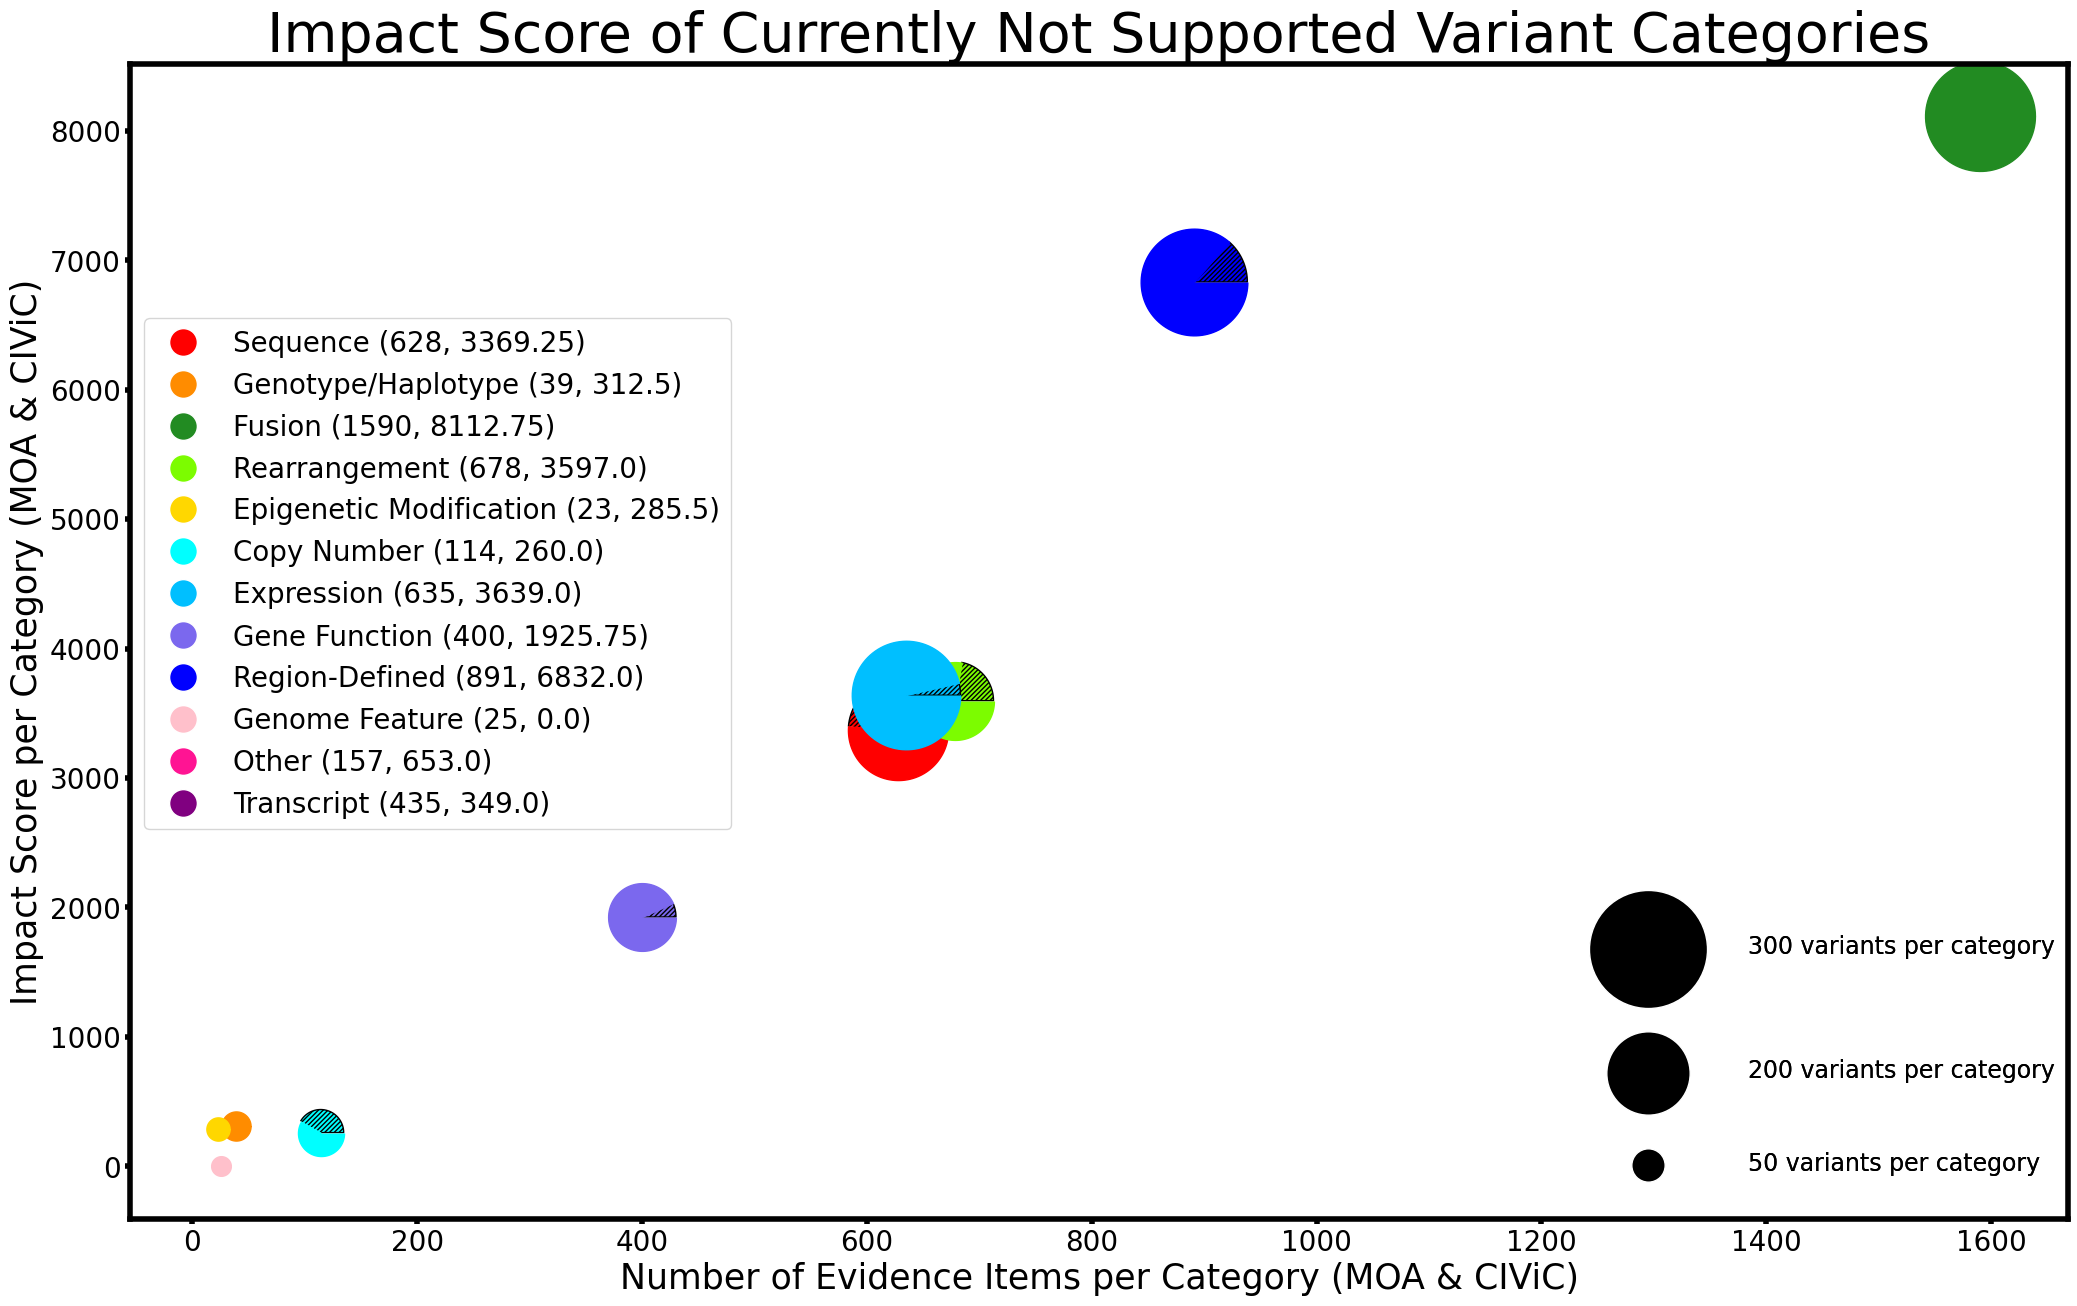

In [95]:
fig5, ax = plt.subplots(figsize=(25, 15))
legend_element_list = []
colors = [
    "red",
    "darkorange",
    "forestgreen",
    "lawngreen",
    "gold",
    "cyan",
    "deepskyblue",
    "mediumslateblue",
    "blue",
    "pink",
    "deeppink"
]
variant_category = variant_category_list

for i in range(10):
    ratio = ratio_list[i]
    size = moa_civic_variant_sum_list[i] * 20
    cat_coor_label = cat_to_coords_list[i]

    # Both will always have b
    x = [0] + np.cos(np.linspace(2 * np.pi * ratio, 2 * np.pi, 100)).tolist()
    y = [0] + np.sin(np.linspace(2 * np.pi * ratio, 2 * np.pi, 100)).tolist()
    marker_b = np.column_stack([x, y])

    if ratio:
        # use both a & b
        x = [0] + np.cos(np.linspace(0, 2 * np.pi * ratio, 100)).tolist()
        y = [0] + np.sin(np.linspace(0, 2 * np.pi * ratio, 100)).tolist()
        marker_a = np.column_stack([x, y])

        ax.scatter(
            moa_civic_evidence_sum_list[i],
            moa_civic_impact_score_list[i],
            marker=marker_a,
            s=size,
            facecolor=colors[i],
            edgecolors="black",
            hatch="///////",
        )

    ax.scatter(
        moa_civic_evidence_sum_list[i],
        moa_civic_impact_score_list[i],
        marker=marker_b,
        s=size,
        facecolor=colors[i],
        label=cat_coor_label,
    )
colors = [
    "red",               
    "darkorange",        
    "forestgreen",       
    "lawngreen",         
    "gold",              
    "cyan",              
    "deepskyblue",       
    "mediumslateblue",   
    "blue",              
    "pink",              
    "deeppink",          
    "purple",            
]    
colors_for_legend = colors[:len(cat_to_coords_list)]

legend_elements = [
    Line2D(
        [0],
        [0],
        marker='o',
        color='w',
        label=f"{category} {coords}",
        markerfacecolor=color,
        markersize=20
    )
    for (category, coords), color in zip(cat_to_coords_list, colors_for_legend)
]
legend_2_elements = [
    Line2D([0], [0], color="w", markerfacecolor="white"),
    Line2D([0], [0], color="w", markerfacecolor="white"),
    Line2D([0], [0], color="w", markerfacecolor="white"),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="          300 variants per category",
        markerfacecolor="black",
        markersize=85,
    ),
    Line2D([0], [0], color="k", markerfacecolor="white"),
    Line2D([0], [0], color="w", markerfacecolor="white"),
    Line2D([0], [0], color="w", markerfacecolor="white"),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="          200 variants per category",
        markerfacecolor="black",
        markersize=60,
    ),
    Line2D([0], [0], color="k", markerfacecolor="white"),
    Line2D([0], [0], color="w", markerfacecolor="white"),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="          50 variants per category",
        markerfacecolor="black",
        markersize=24,
    ),
    Line2D([0], [0], color="w", markerfacecolor="white"),
]

# Create the figure
first_legend = ax.legend(
    handles=legend_elements,
    loc="lower left",
    bbox_to_anchor=(0.0, 0.325, 3, 0.550),
    fontsize=20,
)
# first_legend._legend_box.align = "left"
ax.add_artist(first_legend)
ax.set_xlabel("Number of Evidence Items per Category (MOA & CIViC)", fontsize=25)
ax.set_ylabel("Impact Score per Category (MOA & CIViC)", fontsize=25)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(4)
ax.tick_params(width=4)
second_legend = ax.legend(handles=legend_2_elements, loc="lower right", frameon=False)
ax.add_artist(second_legend)
plt.title("Impact Score of Currently Not Supported Variant Categories", fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.setp(plt.gca().get_legend().get_texts(), fontsize="17")

plt.savefig(
    "../merged_moa_civic/evidence_analysis_output/impact_scatterpie_plot.jpeg",
    dpi=1000,
)


plt.show()

## <a id='toc1_6_'></a>[Building Parallel Impact Plot](#toc0_)

In [96]:
def fig2rgb_array(fig):
    """Converting matplotlib figure type into a numplot array
    :param fig: plt.subplots
    :return: Numplot array
    """
    fig.canvas.draw()
    buf, _ = fig.canvas.print_to_buffer()
    ncols, nrows = fig.canvas.get_width_height()
    return np.frombuffer(buf, dtype=np.uint8).reshape(nrows, ncols, 4)

In [97]:
# Data and options:
pd.set_option("display.width", 1200)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [98]:
Bezier = False
PlotChange = True
Submitted_Opacity = 0.2
# If you want auto colors, change the #Auto Colors setting section below
Autocolors = False

In [99]:
def plot_impact(df: pd.DataFrame) -> pd.DataFrame:
    """Plot impact parallel plot

    :param df: Dataframe of Variant Categories with number of variants, evidence items, and impact score
    :return: Returns a parallel plot with number with number of variants, evidence items, and impact score per Not Supported Variant Subcategories
    """
    df_byImpact = df.copy(deep=True)

    ratios = df_byImpact["Ratio of MOA Features to MOA+CIVIC per Category"].to_list()

    my_vars = ["Sum_Variants", "Sum_Evidence_Items", "Sum_Impact", "Category"]
    my_vars_names = ["Variants", "Evidence Items", "Impact Score", "Variant Category"]

    # Below are settings for line types, font sizes, or hard-coded colors.

    ratioplots = []
    scrapfig, scrapax = plt.subplots(figsize=[0.5, 0.5], dpi=600)

    for ratio in ratios:
        scrapax.pie([ratio, 2.0 - ratio], colors=["black", "darkgrey"])
        data = fig2rgb_array(scrapfig)
        ratioplots.append(data)

    plt.close()

    # Adapt the data:
    df_clean_Impact = df_byImpact[my_vars + ["Line_Width", "Color"]]
    df_clean_Impact = df_clean_Impact.dropna()
    df_clean_Impact = df_clean_Impact.reset_index(drop=True)

    df_plot = df_clean_Impact[my_vars]

    # Convert categories to numeric:
    ym = []
    dics_vars = []
    for v, var in enumerate(my_vars):
        if df_plot[var].dtype.kind not in ["i", "u", "f"]:
            dic_var = dict([(val, c) for c, val in enumerate(df_plot[var].unique())])
            dics_vars += [dic_var]
            ym += [[dic_var[i] for i in df_plot[var].tolist()]]
        else:
            ym += [df_plot[var].tolist()]
    ym = np.array(ym).T

    # Padding:
    ymins = ym.min(axis=0)
    ymaxs = ym.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # Adjust to the main axis:
    zs = np.zeros_like(ym)
    zs[:, 0] = ym[:, 0]
    zs[:, 1:] = (ym[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Auto Colors - V1.0
    n_levels = len(dics_vars[0])
    my_colors = [
        "#F41E1E",
        "#F4951E",
        "#F4F01E",
        "#4EF41E",
        "#1EF4DC",
        "#1E3CF4",
        "#F41EF3",
    ]
    cmap = LinearSegmentedColormap.from_list("my_palette", my_colors)
    my_palette = [cmap(i / n_levels) for i in np.array(range(n_levels))]

    # Plot:
    fig, host_ax = plt.subplots(figsize=(10, 5), tight_layout=True)

    # Make the axes:
    axes = [host_ax] + [host_ax.twinx() for i in range(ym.shape[1] - 1)]
    dic_count = 0

    for i, ax in enumerate(axes):
        ax.set_ylim(bottom=ymins[i], top=ymaxs[i])
        ax.spines.top.set_visible(False)
        ax.spines.bottom.set_visible(False)
        ax.ticklabel_format(style="plain")
        if ax != host_ax:
            ax.spines.left.set_visible(False)
            ax.yaxis.set_ticks_position("right")
            ax.spines.right.set_position(("axes", i / (ym.shape[1] - 1)))

        if df_plot.iloc[:, i].dtype.kind not in ["i", "u", "f"]:
            dic_var_i = dics_vars[dic_count]
            ax.set_yticks(range(len(dic_var_i)))
            ax.set_yticklabels(
                ["             " + key_val for key_val in dics_vars[dic_count].keys()]
            )

            tick_labels = ax.yaxis.get_ticklabels()

            atickcount = 0
            for _ in tick_labels:
                ib = OffsetImage(
                    ratioplots[atickcount][0 : int(len(ratioplots[atickcount]) / 2)],
                    zoom=0.15,
                )

                ib.image.axes = ax
                ab = AnnotationBbox(
                    ib,
                    (i, tick_labels[atickcount].get_position()[1]),
                    frameon=False,
                    box_alignment=(-0.05, 0.3),
                )
                ax.add_artist(ab)
                atickcount += 1

            dic_count += 1

    ax.spines.right.set_visible(False)

    host_ax.set_xlim(left=0, right=ym.shape[1] - 1)

    host_ax.set_xticks(range(ym.shape[1]))

    host_ax.set_xticklabels(my_vars_names, fontsize=14)

    host_ax.tick_params(axis="x", which="major", pad=7)

    host_ax.set_title("Clinical Impact of Not Supported Variants", fontsize=18)

    # Make the curves:
    host_ax.spines.right.set_visible(False)
    host_ax.xaxis.tick_top()
    host_ax.tick_params(axis="x", which="both", length=0)
    for j in range(ym.shape[0]):
        if Bezier:
            verts = list(
                zip(
                    [
                        x
                        for x in np.linspace(
                            0, len(ym) - 1, len(ym) * 3 - 2, endpoint=True
                        )
                    ],
                    np.repeat(zs[j, :], 3)[1:-1],
                )
            )
            codes = [mPath.MOVETO] + [mPath.CURVE4 for _ in range(len(verts) - 1)]
        else:
            verts = list(zip([x for x in range(len(ym))], zs[j, :]))
            codes = [mPath.MOVETO] + [mPath.LINETO for _ in range(len(verts) - 1)]
        mpath = mPath(verts, codes)

        if Autocolors:
            acolor = my_palette[j % len(dics_vars[0])]
        else:
            acolor = df_clean_Impact["Color"].iloc[j]

        patch = mpatches.PathPatch(
            mpath,
            facecolor="none",
            lw=df_clean_Impact["Line_Width"].iloc[j],
            edgecolor=acolor,
        )
        host_ax.add_patch(patch)
    return ax

Only accepted variants

In [100]:
merged_accepted_only_impact_df["Category"] = merged_accepted_only_impact_df[
    "Category"
].str.replace("Variants", "")

<Axes: >

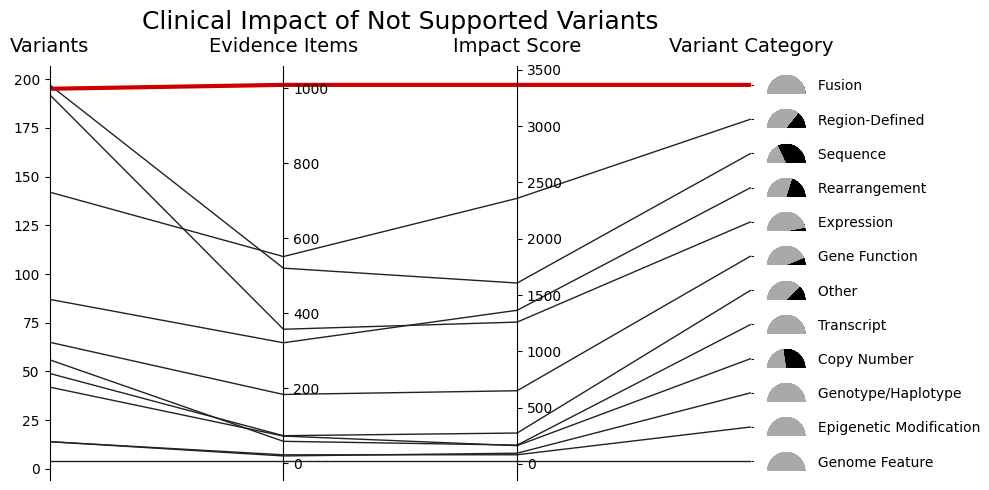

In [101]:
merged_accepted_only_impact_plot = plot_impact(merged_accepted_only_impact_df)
merged_accepted_only_impact_plot

In [102]:
merged_accepted_only_impact_plot.figure.savefig(
    "evidence_analysis_output/merged_accepted_only_impact_plot.png", dpi=1000
)

Both accepted and submitted variants

In [103]:
merged_both_impact_df["Category"] = merged_both_impact_df["Category"].str.replace(
    "Variants", ""
)

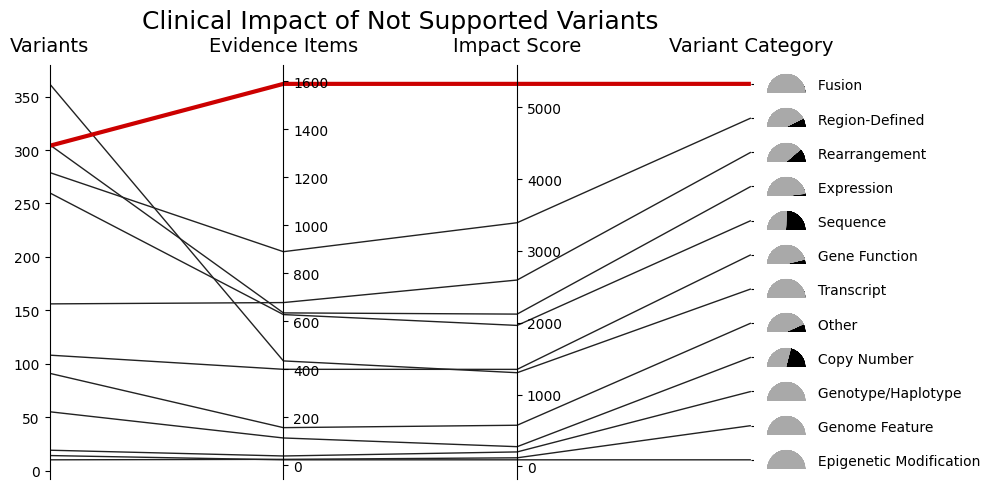

In [104]:
merged_both_impact_plot = plot_impact(merged_both_impact_df)

In [105]:
merged_both_impact_plot.figure.savefig(
    "evidence_analysis_output/merged_both_impact_plot.png", dpi=1000
)